
#  <center>         HEART DISEASE PREDICTION- MAJOR FACTORS RESPONSIBLE</center>
  <h1><center>          Toyin Verity-Egho </center></h1>
  <h2><center>                       Date : May 10, 2023  </center></h2>

#                                        1 Introduction
Every portion of our anatomy receives blood from the heart, this makes it a crucial organ in the body because, if the heart fails to function effectively, every organ will stop functioning and will result to death. Cardiovascular(heart) disease, three important actions are required which are, (1) surveillance and monitoring, (2) risk factor reduction and prevention and (3), improved treatment. 
To accurately forecast heart disease using machine learning approaches, medical organisations gather data on a variety of health-related concerns. 
The goal of this effort is to investigate the most effective models for predicting heart illnesses and pinpoint the variables that contribute to this prediction.
 
  Therefore, the dataset used for this work is dataset taken from UCI repository. There are fourteen columns in it. It contained no missing values. The description of the features is in the main report of this work. 
  The features are well explored to know which is responsible most for heart disease among the features present in the dataset and plays significant role in the prediction. 
    Five algorithms were used for this work. They are: Naive bayes, K-nn, decision tree, random forest classifier and support vector machine; This is because a single algorithm may not make a perfect prediction, so using multiple boost the overall accuracy
    The process begins below.


#           1.1 Importing All Required Libraries For The Dataset.

In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#sns.set_style('whitegrid')
#import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


# 2. Loading And Describing the Dataset.

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Statistical view of the dataset to understand the features settings
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [5]:
#for detail description of the dataset. This is to check if there is any null value, double entries etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#Definition of the column headers


# 1. age
# 2.sex
# 3.chest pain type (4 values)
# 4.resting blood pressure
# 5.serum cholestoral in mg/dl (chol)
# 6.fasting blood sugar > 120 mg/dl
# 7.resting electrocardiographic results (values 0,1,2)
# 8.maximum heart rate achieved
# 9.exercise induced angina (exang)
# 10.oldpeak = ST depression induced by exercise relative to rest
# 11.the slope of the peak exercise ST segment
# 12.number of major vessels (0-3) colored by flourosopy
# 13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.shape


(1025, 14)

In [9]:
df.describe().age


count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [10]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.duplicated().sum()


723

In [12]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [13]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


In [14]:
#Observations:
# NO NULL VALUE
# AGE RANGE= 29-77
#713 MALE AND 312 FEMALE


# 3. Visualization- Analysis of dataframe features

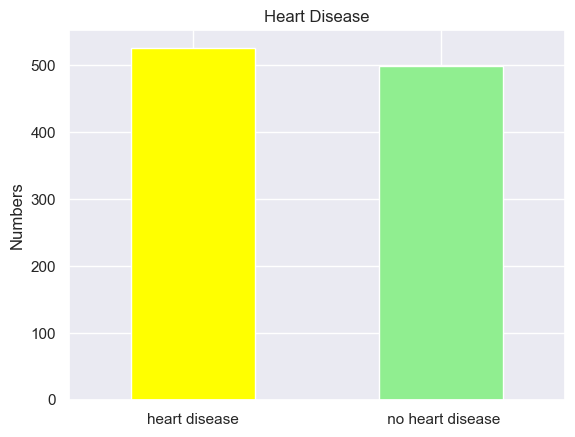

In [15]:
#plot the target bar chart and pie chart 
fig = df.target.value_counts().plot(kind = 'bar', color=["yellow", 'lightgreen'])
plt.title("Heart Disease")
plt.ylabel("Numbers");
fig.set_xticklabels(labels=['heart disease', " no heart disease"], rotation=0);


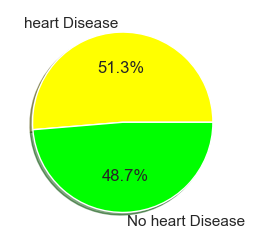

In [16]:


# create the pie chart of the target value for proportional view
plt.subplot(1, 2, 2)
plt.pie(df["target"].value_counts(), labels = ["heart Disease", "No heart Disease"], shadow = True, 
        autopct = "%1.1f%%", colors = ["#FFFF00",  "#00FF00"])
plt.show()


# Anaysis by Sex

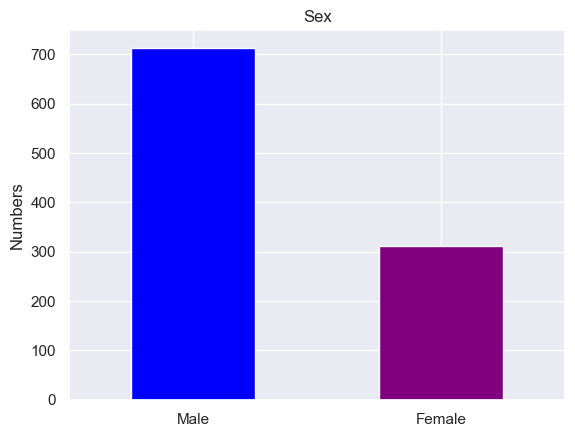

In [17]:
# Bar plot of the sex distribution 
fig=df.sex.value_counts().plot(kind='bar', color=["blue",'purple'])
plt.title('Sex')
plt.ylabel('Numbers');
fig.set_xticklabels(labels=['Male', "Female"], rotation=0);


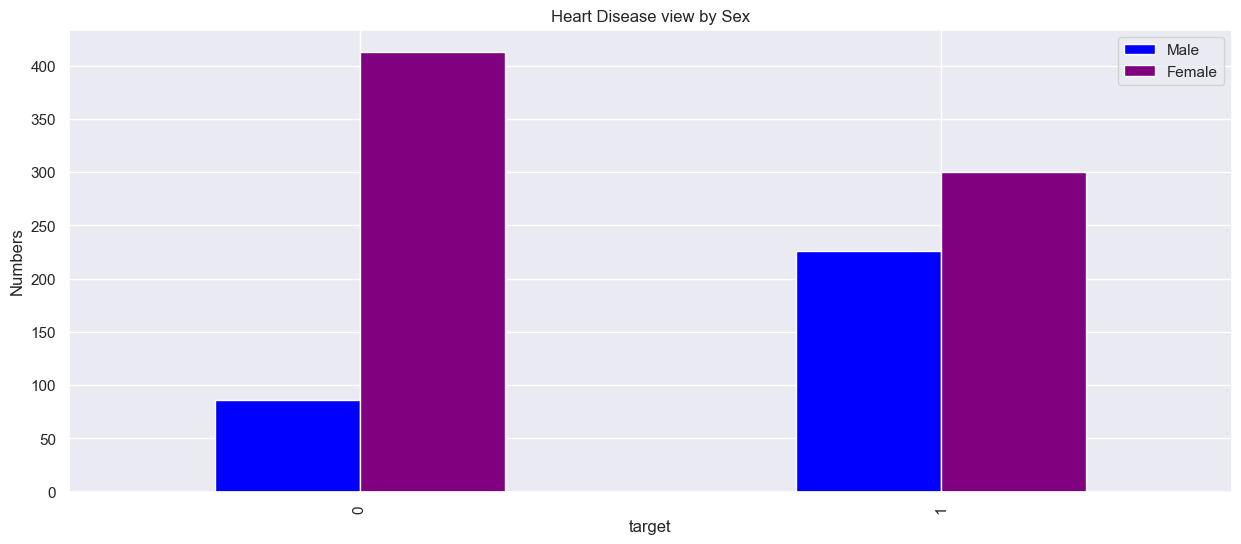

In [18]:
#Number of female and male who has heart disease OR do not have heart disease
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(15,6),
                                    color=["blue", "purple"])
fig.set_xticklabels(labels=["No heart disease", 'Has heart disease'], rotation=0)
plt.title('Heart Disease view by Sex')
plt.legend(["Male", "Female"])
plt.ylabel('Numbers')
plt.show()

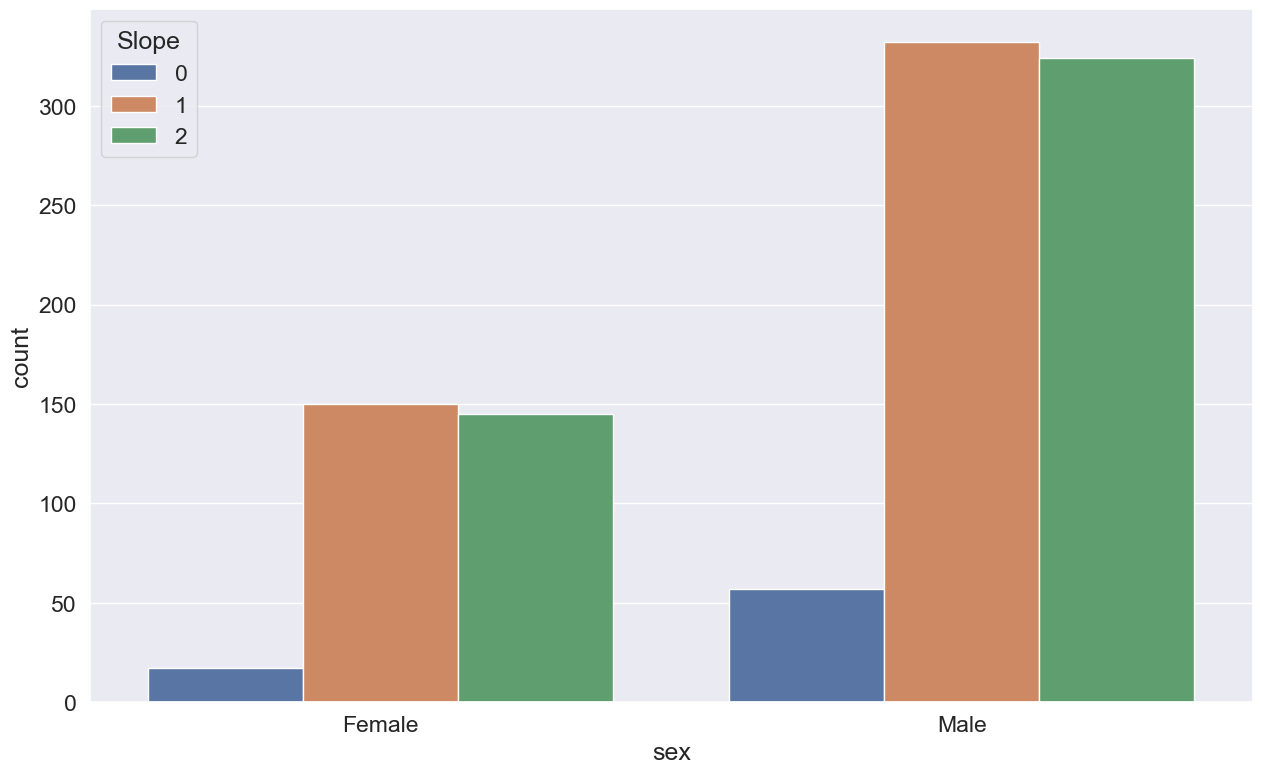

In [19]:
# Correlation between sex and slope

plt.figure(figsize=(15,9))
sns.set_context('notebook',font_scale = 1.5)
ax = sns.countplot(x=df['sex'],hue=df["slope"])
ax.set_xticklabels(['Female', 'Male'])
plt.legend(title="Slope", loc="upper left")
plt.show()


# Age Analysis

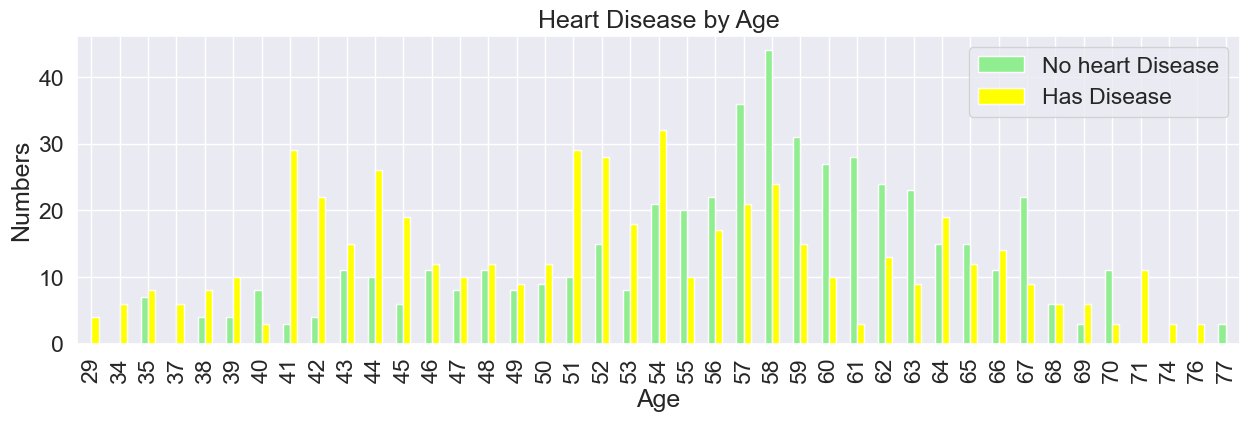

In [20]:
#What ages shows more occurence of heart disease?
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(15, 4), color=['lightgreen', 'yellow'])
plt.title('Heart Disease by Age')
plt.ylabel('Numbers')
plt.xlabel('Age')
plt.legend(["No heart Disease", "Has Disease"])
plt.show()

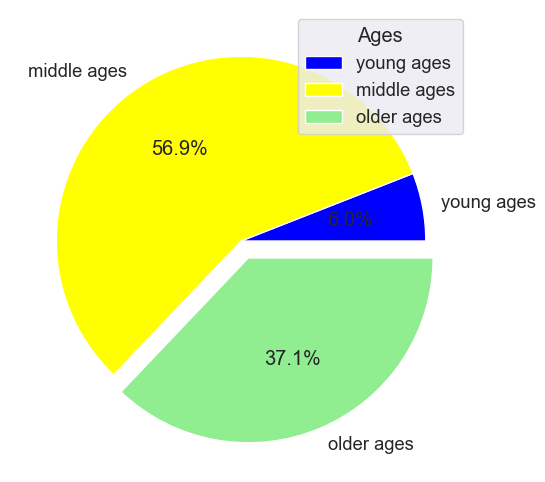

In [21]:
colors = ['blue','yellow','lightgreen']
young = df[(df.age>=29)&(df.age<40)]
middle = df[(df.age>=40)&(df.age<58)]
older = df[(df.age>58)]

explode = [0,0,0.1]
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(young),len(middle),len(older)],labels=['young ages','middle ages','older ages'],
        explode=explode,colors=colors, autopct='%1.1f%%')
plt.legend(title="Ages", loc="upper right")
plt.show()

# Explanation:
The graph displays a pie chart with the proportion of individuals in each age category in the dataset. Three categories—young ages, medium ages, and senior ages—are used to separate the age groupings. According to the graph, young individuals (27.1%), middle-aged (56.5%), and senior persons (16.4%) make up the bulk of the dataset's participants.

# FBS, TRESTBPS, OLPEAK, THALACH, EXANG  Visualization

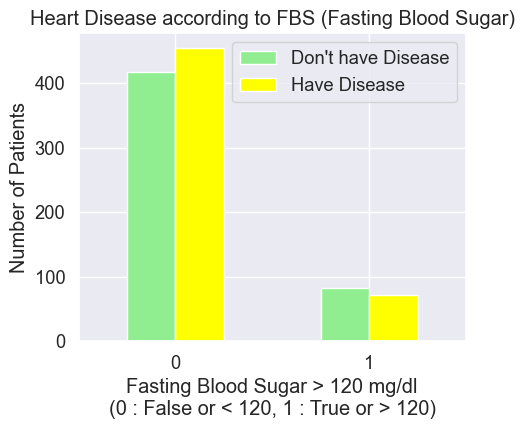

In [22]:
#Viewing FBS in relation to heart disease 
# Group the data by target and fbs
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(5, 4), color=['lightgreen', 'yellow'])
plt.title('Heart Disease according to FBS (Fasting Blood Sugar)')
plt.ylabel('Number of Patients')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl\n(0 : False or < 120, 1 : True or > 120)')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

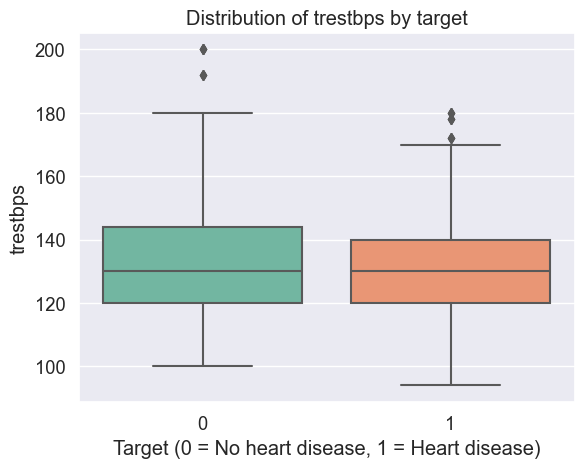

In [23]:
sns.boxplot(x='target', y='trestbps', data=df, palette='Set2' )
plt.title('Distribution of trestbps by target')
plt.xlabel('Target (0 = No heart disease, 1 = Heart disease)')
plt.ylabel('trestbps')
plt.show()

# Explanation:
From the 2 boxes above, we can see that the medican blood pressure is higher for the target value '1'; which is presence of heart disease compared to target value '0'; no heart disease. Also, the interquartile range for '1' is wider than that of '0'. the outliers in both categories indicates that there may be some people with high or low resting blood pressure levels in both categories. Further analysis will be necessary to determine the strength of the relationship of these categories with the target.

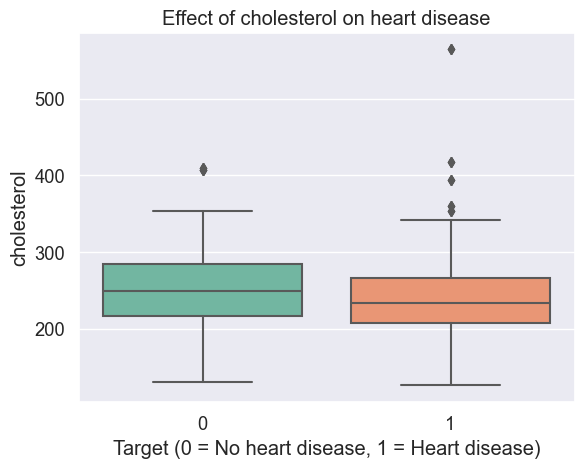

In [24]:
#Chart to show the correlation between cholesterol and heart disease
sns.boxplot(data=df, x='target', y='chol', palette='Set2')
plt.title('Effect of cholesterol on heart disease')
plt.xlabel('Target (0 = No heart disease, 1 = Heart disease)')
plt.ylabel('cholesterol')
plt.show()

# Explanation:
From the chart above, cholesterol level does not have much relationship for prediction of heart disease in a patient. There are outliers in the 2 group. This implies there should be further investigation on th erelationship between level of cholesterol and heart disease.

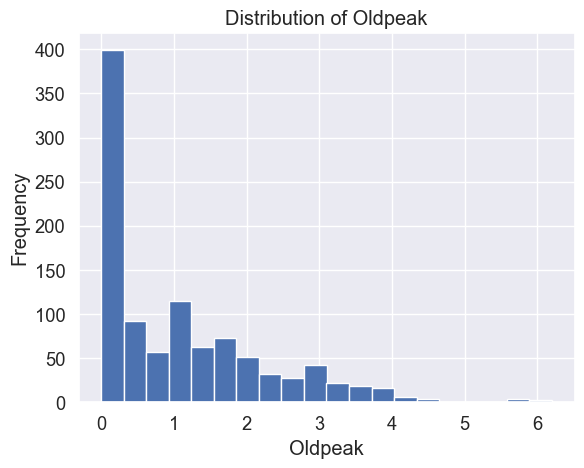

In [25]:
plt.hist(df['oldpeak'], bins=20)
plt.title('Distribution of Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

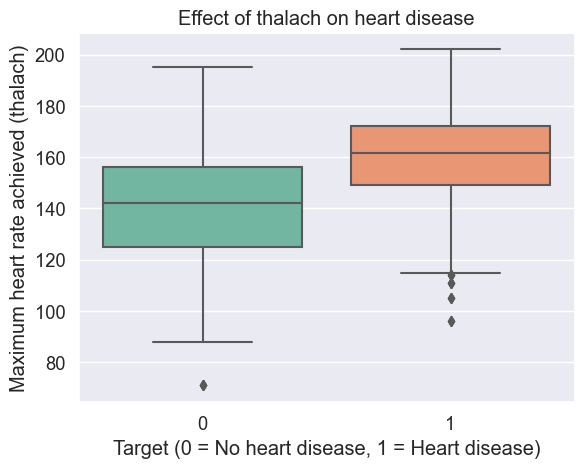

In [26]:
# Plot the relationship using Seaborn
sns.boxplot(data=df, x='target', y='thalach', palette='Set2')
plt.title('Effect of thalach on heart disease')
plt.xlabel('Target (0 = No heart disease, 1 = Heart disease)')
plt.ylabel('Maximum heart rate achieved (thalach)')
plt.show()

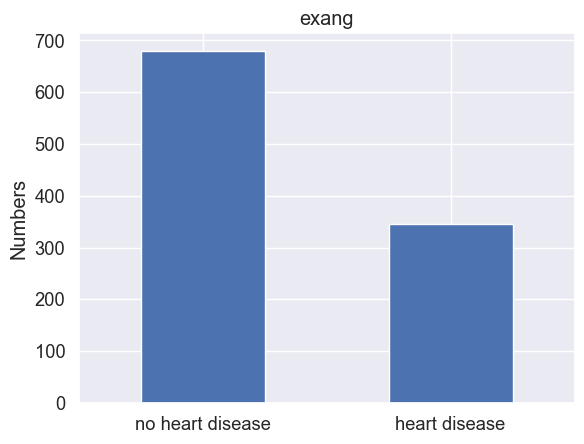

In [27]:
#viewing exang within the dataset
fig=df.exang.value_counts().plot(kind='bar')
plt.title('exang')
plt.ylabel('Numbers');
fig.set_xticklabels(labels=['no heart disease', "heart disease"], rotation=0);

#   Chest Pain (cp) and Cardiac Arest (ca) Visualization

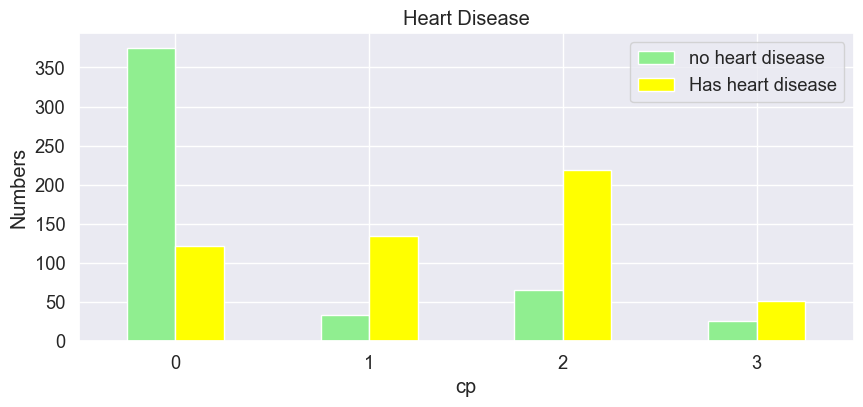

In [28]:
#Relationship between heart disease and chest pain type (0-3)
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 4), color=["Lightgreen", 'yellow'])
plt.title("Heart Disease")
plt.ylabel("Numbers");
plt.xlabel('cp')
plt.legend(['no heart disease', 'Has heart disease'])
plt.xticks(rotation=0)
plt.show()


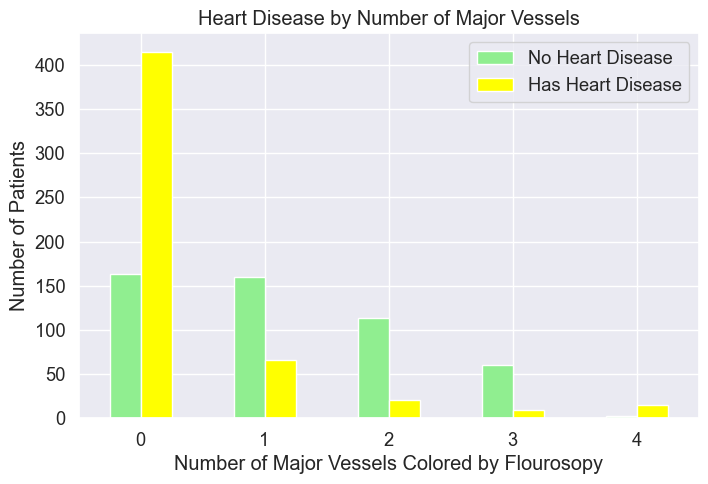

In [29]:
# Relationship between heart disease and number of major vessels colored by flourosopy
pd.crosstab(df.ca, df.target).plot(kind="bar", figsize=(8, 5), color=["lightgreen", "yellow"])
plt.title("Heart Disease by Number of Major Vessels")
plt.xlabel("Number of Major Vessels Colored by Flourosopy")
plt.ylabel("Number of Patients")
plt.legend(["No Heart Disease", "Has Heart Disease"])
plt.xticks(rotation=0)
plt.show()


# Correlation Between the independent Variables

Text(0.5, 1.0, 'Heart Disease')

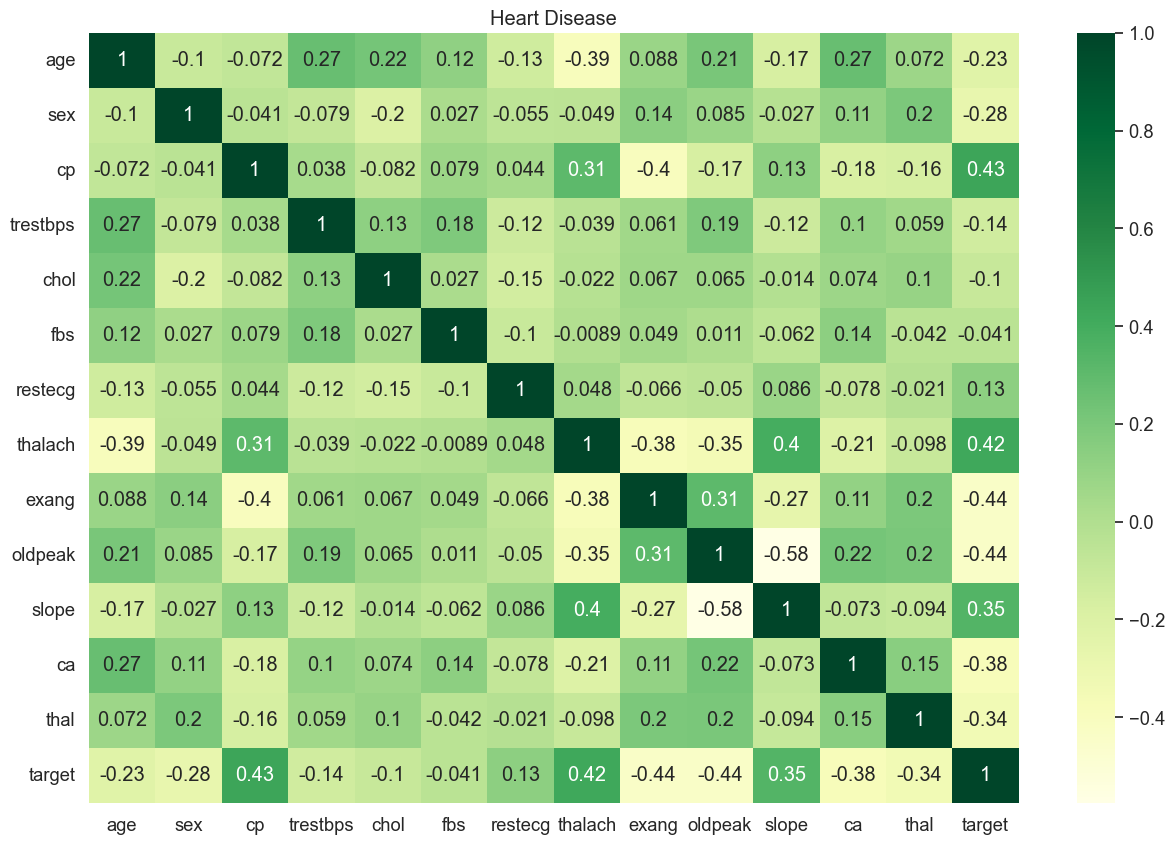

In [30]:
#Correlation Matrix
plt.figure(figsize=(15,10))
cmap=sns.color_palette("YlGn", as_cmap=True)
plot=sns.heatmap(df.corr(), cmap=cmap, annot=True)
plot.set_title("Heart Disease")


# The Corelation Matrix Explanation:
The graph shows that a number of factors have a positive correlation with heart disease.
 Age, sex, chest pain category, exang (exercise-induced angina), oldpeak (ST depression brought on by exercise compared to rest), slope (slope of the peak exercise ST segment), ca (number of major vessels coloured by flourosopy), thal (thalassemia), and the target variable (presence of heart disease) are some of these factors.
On the other hand, some factors, including cp (chest pain kind), trestbps (resting blood pressure), and chol (serum cholesterol), have a negative correlation with heart disease. Higher levels of these factors are linked to a lower risk of heart disease, according to the negative connection between these variables and heart disease.



#  Summary of the Visualization:
 
The charts examine many factors to determine their relationship to heart disease. Heart disease risk is correlated with high FBS levels, trestbps, cholesterol levels, and low thalach values. Significant heart disease predictors are exang and the type of chest pain. The chance of heart disease is increased if 1 or 2 main veins are coloured by flourosopy. Oldpeak value distribution reveals a wide range of values, with some patients having extremely elevated levels. Additionally, the graphs demonstrate that the population under study ranged in age from 29 to 77, with the age group of those between 41 and 58 having the highest prevalence of heart disease.


# 4. DATA PRE-PROCESSING

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
x=df.drop('target', axis=1)


In [33]:
y=df['target']

In [34]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [36]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# 5. Feature Engineering

In [37]:
#Scaling The Data
from sklearn.preprocessing import StandardScaler
df_scale=StandardScaler()
#fitting  the scaler on the transformed data 'x'
df_xscale= df_scale.fit_transform(x)


In [38]:
df_xscale

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

# 6. Dataset Splitting -Creating The Model

In [39]:
#splitting the data into train and test set and creating the model
#x as the feature Dataframe, y as the target series
x_train,x_test,y_train,y_test=train_test_split(df_xscale, y, test_size=0.2, random_state=42)


# Creating the Model

# a. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
pred = nb.predict(x_test)
#evaluate the model on the test
print("Naive Bayes train score : {:.4f}%".format(nb.score(x_train, y_train)*100))
print("Naive Bayes test score : {:.4f}%".format(nb.score(x_test, y_test)*100))


Naive Bayes train score : 83.9024%
Naive Bayes test score : 80.0000%


# b. K-NN Algorithm

In [41]:
# KNN Model
#Training and testing the dataset
from sklearn.neighbors import KNeighborsClassifier
#check different k

Acc = []
for i in range(2, 21):
    print("Number of K:", i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
#evaluate the model on the test
    print("k-NN train score : {:.4f}%".format(knn.score(x_train, y_train)*100))
    print("k-NN test score : {:.4f}%".format(knn.score(x_test, y_test)*100))
    Acc.append(knn.score(x_test, y_test)*100)
    print(classification_report(y_test,pred))

print(Acc)


Number of K: 2
k-NN train score : 99.8780%
k-NN test score : 97.5610%
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       102
           1       1.00      0.95      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Number of K: 3
k-NN train score : 99.5122%
k-NN test score : 93.6585%
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       0.92      0.95      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

Number of K: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 97.0732%
k-NN test score : 88.7805%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       102
           1       0.92      0.85      0.88       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Number of K: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 94.8780%
k-NN test score : 83.4146%
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

Number of K: 6
k-NN train score : 90.0000%
k-NN test score : 82.9268%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.83      0.83      0.83       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205

Number of K: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 89.3902%
k-NN test score : 83.9024%
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       102
           1       0.81      0.89      0.85       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

Number of K: 8
k-NN train score : 89.3902%
k-NN test score : 85.3659%
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.83      0.89      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Number of K: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 88.2927%
k-NN test score : 85.3659%
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.83      0.89      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Number of K: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 88.0488%
k-NN test score : 83.9024%
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       102
           1       0.84      0.83      0.84       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

Number of K: 11
k-NN train score : 89.3902%
k-NN test score : 82.4390%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       102
           1       0.82      0.83      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

Number of K: 12
k-NN train score : 89.0244%
k-NN test score : 81.9512%
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       102
           1       0.82      0.83      0.82       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

Number of K: 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 89.1463%
k-NN test score : 81.4634%
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       102
           1       0.79      0.86      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Number of K: 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 89.8780%
k-NN test score : 81.9512%
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.80      0.85      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

Number of K: 15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 88.6585%
k-NN test score : 80.0000%
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.77      0.85      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205

Number of K: 16


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 88.9024%
k-NN test score : 80.4878%
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       102
           1       0.79      0.83      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Number of K: 17


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 87.9268%
k-NN test score : 80.0000%
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       102
           1       0.78      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205

Number of K: 18


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN train score : 87.5610%
k-NN test score : 80.9756%
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       102
           1       0.79      0.84      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

Number of K: 19
k-NN train score : 88.5366%
k-NN test score : 82.9268%
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       102
           1       0.80      0.88      0.84       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205

Number of K: 20
k-NN train score : 88.0488%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-NN test score : 81.9512%
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.79      0.86      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

[97.5609756097561, 93.65853658536587, 88.78048780487805, 83.41463414634146, 82.92682926829268, 83.90243902439025, 85.36585365853658, 85.36585365853658, 83.90243902439025, 82.4390243902439, 81.95121951219512, 81.46341463414633, 81.95121951219512, 80.0, 80.48780487804879, 80.0, 80.97560975609757, 82.92682926829268, 81.95121951219512]


range(2, 21)


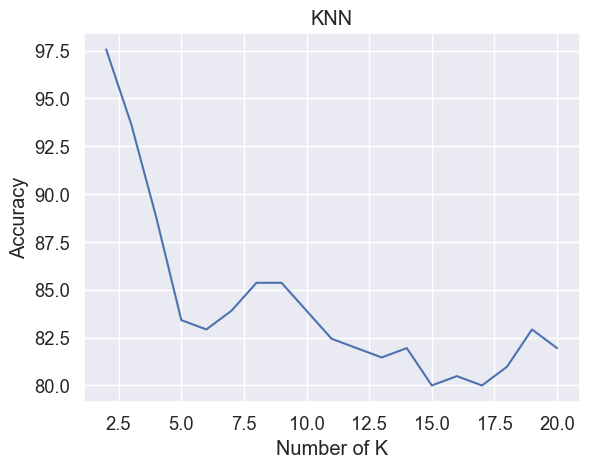

In [42]:

x_axis = range(2,21)
y_axis = Acc
print(x_axis)
plt.plot(x_axis, y_axis)
plt.title('KNN')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.show()


# c. Decision Tree Algorithm

In [43]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(x_train, y_train)
#evaluate the model on the test
print("Decision Tree train score : {:.4f}%".format(tree.score(x_train, y_train)*100))
print("Decision Tree test score : {:.4f}%".format(tree.score(x_test, y_test)*100))
print(classification_report(y_test,pred))


Decision Tree train score : 97.3171%
Decision Tree test score : 91.2195%
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.79      0.86      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



# d. Random Forest Classifier Algorithm

In [44]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
forest.fit(x_train, y_train)
#evaluate the model on the test
print("RandomForest train score : {:.4f}%".format(forest.score(x_train, y_train)*100))
print("RandomForest test score : {:.4f}%".format(forest.score(x_test, y_test)*100))
print(classification_report(y_test,pred))


RandomForest train score : 99.0244%
RandomForest test score : 95.1220%
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.79      0.86      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



# e. SVM (Support Vector Machine) Algorithm.

In [45]:
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

#evaluate the model on the test
print("SVM train score : {:.4f}%".format(svm.score(x_train, y_train)*100))
print("SVM test score : {:.4f}%".format(svm.score(x_test, y_test)*100))
print(classification_report(y_test,pred))


SVM train score : 95.4878%
SVM test score : 88.7805%
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.79      0.86      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



# 7. Confusion Matrix.

<AxesSubplot:title={'center':'Naive Bayes'}>

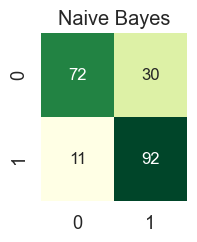

In [46]:
#visualisation of the confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix
pred_nb = nb.predict(x_test)
cm_nb = confusion_matrix(y_test, pred_nb)
plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb, annot=True, cmap="YlGn", fmt="d", cbar=False, annot_kws={"size": 12})



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:title={'center':'K-Nearest Neighbors'}>

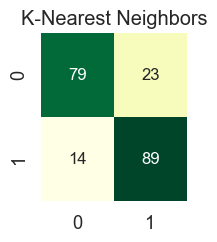

In [47]:
pred_knn = knn.predict(x_test)
cm_knn = confusion_matrix(y_test, pred_knn)
plt.subplot(2,3,4)
plt.title("K-Nearest Neighbors")
sns.heatmap(cm_knn, annot=True, cmap="YlGn", fmt="d", cbar=False, annot_kws={"size": 12})


<AxesSubplot:title={'center':'Decision Tree'}>

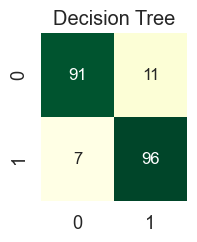

In [48]:
#Decision Tree
pred_tree = tree.predict(x_test)
cm_tree = confusion_matrix(y_test, pred_tree)
plt.subplot(2,3,4)
plt.title("Decision Tree")
sns.heatmap(cm_tree, annot=True, cmap="YlGn", fmt="d", cbar=False, annot_kws={"size": 12})


<AxesSubplot:title={'center':'Random Forest'}>

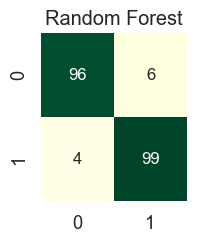

In [49]:
#Random Forest Classifier

pred_forest = forest.predict(x_test)
cm_forest = confusion_matrix(y_test, pred_forest)
plt.subplot(2,3,4)
plt.title("Random Forest")
sns.heatmap(cm_forest, annot=True, cmap="YlGn", fmt="d", cbar=False, annot_kws={"size": 12})


<AxesSubplot:title={'center':'svm'}>

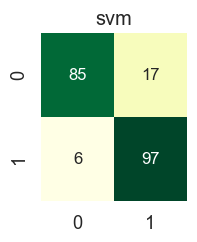

In [50]:
# SVM
pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, pred_svm)
plt.subplot(2,3,4)
plt.title("svm")
sns.heatmap(cm_svm, annot=True, cmap="YlGn", fmt="d", cbar=False, annot_kws={"size": 12})


# 8. Test-Accuracy Comparison.

In [51]:
print("k-NN test score : {:.4f}%".format(knn.score(x_test, y_test)*100))
print("RandomForest test score : {:.4f}%".format(forest.score(x_test, y_test)*100))
print("SVM test score : {:.4f}%".format(svm.score(x_test, y_test)*100))
print("Naive Bayes test score : {:.4f}%".format(nb.score(x_test,y_test)*100))
print("Decision Tree test score {:.4f}%".format(tree.score(x_test, y_test)*100))
knn_score=knn.score(x_test, y_test)*100
forest_score=forest.score(x_test, y_test)*100
svm_score=svm.score(x_test, y_test)*100
nb_score=nb.score(x_test,y_test)*100
tree_score=tree.score(x_test, y_test)*100


k-NN test score : 81.9512%
RandomForest test score : 95.1220%
SVM test score : 88.7805%
Naive Bayes test score : 80.0000%
Decision Tree test score 91.2195%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Visualizing the above results

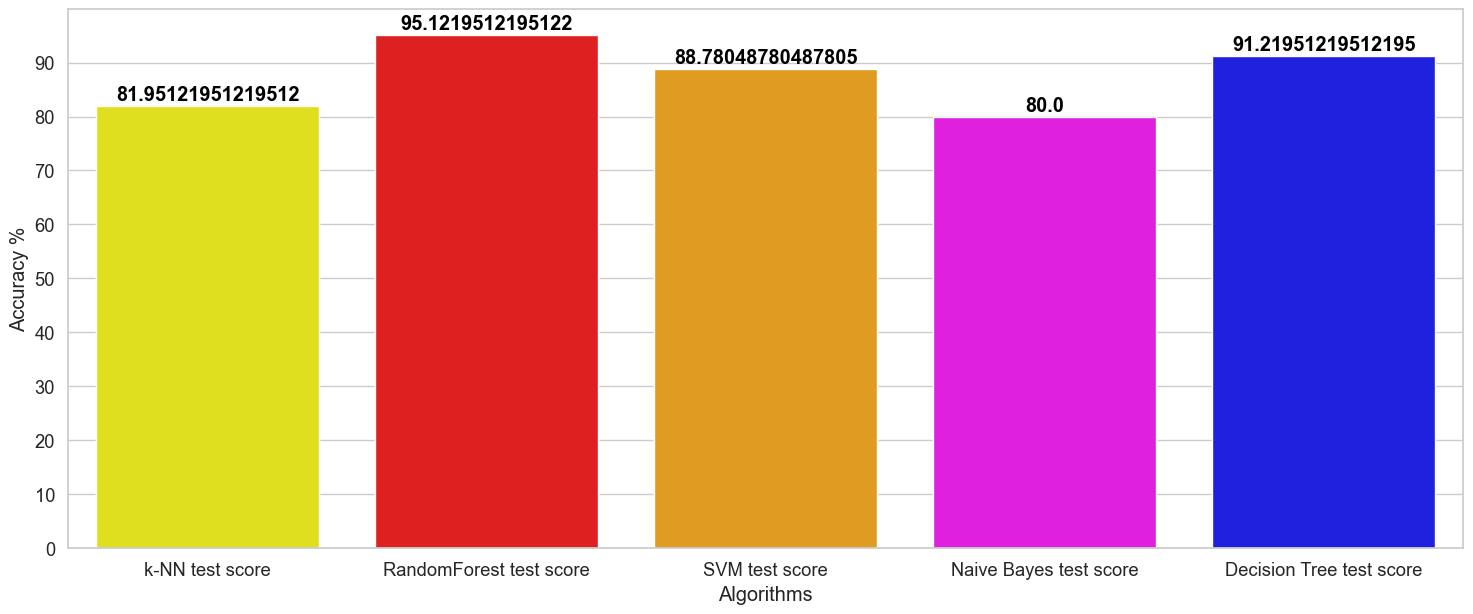

In [52]:
#Plot comparing Model:
colors = ["yellow", "red", "orange", "magenta","blue",]

sns.set_style("whitegrid")
plt.figure(figsize=(18,7))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
accuracies = {'k-NN test score': knn_score, 'RandomForest test score': forest_score, 'SVM test score':svm_score,'Naive Bayes test score':nb_score,'Decision Tree test score':tree_score}
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
for i, v in enumerate(list(accuracies.values())):
    ax.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')
    
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


# Explanation:

it is observed that the random forest model is the best model for the prediction of heart disease. However, this model needs to be evaluated for its accuracy.  This is what will be explored in the next phase. The cross validation is to be done on the Random Forest.

# 9. Cross-Validating The Random Forest Model.


In [53]:
from sklearn.model_selection import cross_val_score,KFold
Forest=RandomForestClassifier(n_estimators=100,random_state=42)
#defining the number of folds for the cross validation
KFold=KFold(n_splits=5, shuffle=True, random_state=42)
#Evaluating the model using cross-validation
Scores=cross_val_score(Forest,x,y,cv=KFold)
print("Accuracy: %0.2f (+/- %0.2f)" % (Scores.mean(), Scores.std() * 2))
print("Accuracy from each of 5 folds: ", Scores)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (Scores.mean()*100.0, Scores.std()*100.0))


Accuracy: 1.00 (+/- 0.01)
Accuracy from each of 5 folds:  [0.98536585 1.         1.         1.         1.        ]
Mean Accuracy: 99.707%, Standard Deviation: (0.585%)


# Explanation of the above cross validation result:
The above result can be explained in 3 ways just as the result prints.

The cross-validation result reveals an accuracy of 1.00 (plus or minus 0.01), demonstrating the model's extremely high accuracy and minimal variance. A model has a flawless accuracy rating of 1.00 if it accurately predicts every sample in the test set for every fold. The accuracy across folds' +/- 0.01 standard deviation is quite low, demonstrating that the model performs consistently across all of the folds.
The accuracy score for each of the five folds is displayed, and while it varies somewhat from 0.985 to 1.0, it is all quite high. This indicates that the model is not overfitting to any one fold and is performing consistently well across all folds.
The mean accuracy, which is given as 99.707%, is calculated as the average of the accuracy ratings across all folds. The standard deviation, which is displayed as 0.585%, is calculated as the standard deviation of the accuracy scores across all folds. With a modest variance of 0.585%, this demonstrates the model's great accuracy and consistency over all folds. The model is performing quite well overall, according to the cross-validation result, and it is not overfitting to any particular fold. The model's performance is consistent and reliable, as seen by the low standard deviation.

# 10. Applying SHAP Value on the data.
The objective of this action is to understand the most important features for the prediction. This would help to understand how the models makes prediction.

In [54]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable


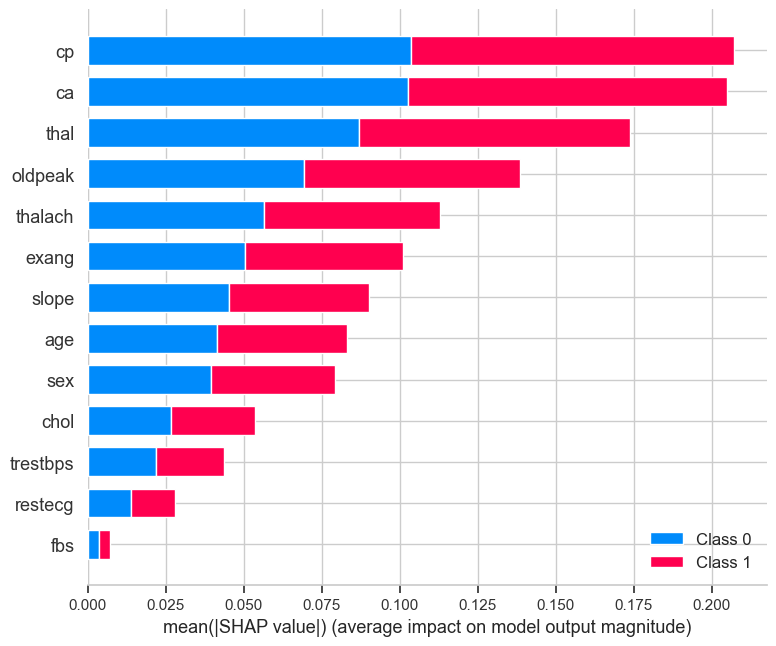

In [55]:
#Applying SHAP to interprete the data:
import shap 
df = pd.read_csv('heart.csv')
x = df.drop('target', axis=1)
y = df['target']

# Train a Random Forest regressor
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(x, y)

# Calculate SHAP values for the training data
shap_values = shap.TreeExplainer(forest).shap_values(x)

# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values, x, plot_type="bar", feature_names=x.columns)

# Explanation of the SHAP value result:
The colour of the bar above represent the direction of the effect of the feature on the prediction.
The RED is for high values, BLUE for low values while the length of each bar represent the magnitude of the effect.Therefore, looking at the ploted chart the features with the longest bars played important role in the prediction. 
The cp(Chest Pain) and CA (coronary artery) followed by Thal(Thalassemial)contributed most to the model decision making. 